<a href="https://colab.research.google.com/github/AvoCahDoe/PFE/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [14]:
import tensorflow as tf  # Pour utiliser TensorFlow
from keras.preprocessing import image  # Pour le prétraitement des données dans Keras
import matplotlib.pyplot as plt  # Pour les graphiques
from PIL import Image  # Pour importer des images
import numpy as np  # Pour utiliser les tableaux numpy
from tensorflow import keras  # Pour importer Keras à partir de TensorFlow
import time  # Pour calculer le temps
from keras.models import Sequential, Model  # Pour le modèle séquentiel Keras


In [17]:
import os  # Pour importer le système d'exploitation
import sys
from math import log  # Pour utiliser la fonction logarithme dans math
import scipy as sp  # Pour utiliser la bibliothèque SciPy
import pandas as pd  # Pour manipuler des DataFrames pandas
import seaborn as sns  # Pour les graphiques avec Seaborn
import keras  # Pour importer Keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn import metrics  # Pour importer des mesures de performance depuis sklearn
from sklearn.utils import class_weight  # Pour gérer les données déséquilibrées
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [18]:
# Définir la taille de l'image à 150
img_size = 150

# Définir les données d'entraînement
train = ImageDataGenerator().flow_from_directory(directory='/gdrive/MyDrive/MaliMg/train', target_size=(img_size, img_size), batch_size=10000)
# Définir les données de validation
val = ImageDataGenerator().flow_from_directory(directory='/gdrive/MyDrive/MaliMg/val', target_size=(img_size, img_size), batch_size=10000)
# Définir les données de test
test = ImageDataGenerator().flow_from_directory(directory='/gdrive/MyDrive/MaliMg/test', target_size=(img_size, img_size), batch_size=10000)

Found 6713 images belonging to 25 classes.
Found 830 images belonging to 25 classes.
Found 863 images belonging to 25 classes.


In [19]:
train.class_indices
d = train.class_indices
d.keys()

dict_keys(['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'])

In [21]:
# Charger les données d'images et les étiquettes d'entraînement
imgs_train, labels_train = next(train)

In [22]:
# Charger les données d'images et les étiquettes de validation
imgs_val, labels_val = next(val)

In [23]:
# Afficher la forme des données d'entraînement
imgs_train.shape
# Afficher la forme des étiquettes des données d'entraînement
labels_train.shape

(6713, 25)

In [24]:
print(labels_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


<BarContainer object of 25 artists>

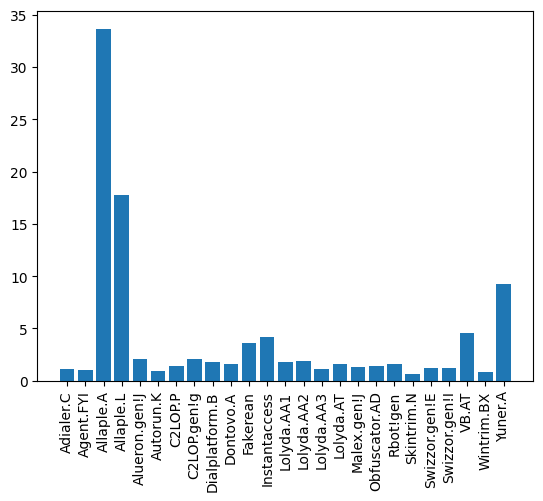

In [25]:
#to print the classes percentage distributions
classes = train.class_indices.keys()
perc = (sum(labels_train)/labels_train.shape[0])*100

#show the gragh
plt.xticks(rotation='vertical')
plt.bar(classes,perc)


-------------------------------------------------------------------

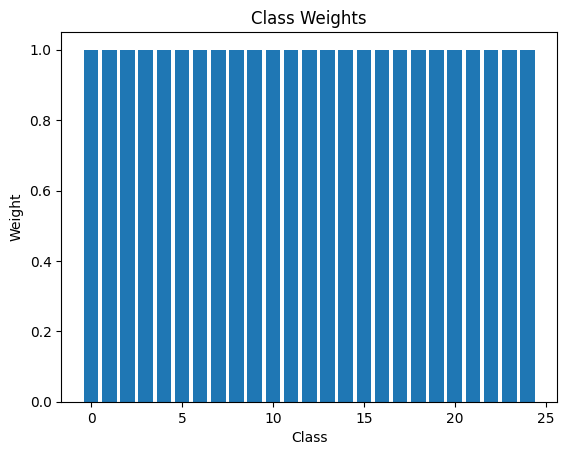

In [26]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# Convert one-hot encoded labels to class labels
class_labels_train = np.argmax(labels_train, axis=1)
# Now, you can calculate class weights using compute_class_weight()
class_weights = compute_class_weight(class_weight=None,classes=np.unique(class_labels_train), y=class_labels_train)


import matplotlib.pyplot as plt
# Plot the weights for each class
plt.bar(np.unique(class_labels_train), class_weights)
plt.xlabel('Class')
plt.ylabel('Weight')
plt.title('Class Weights')
plt.show()


In [27]:
import numpy as np
print("------------------------------------------------------")
print(labels_train)
class_labels_train = np.argmax(labels_train, axis=1)
print("------------------------------------------------------")
print(class_labels_train)
print("------------------------------------------------------")
y = np.unique(class_labels_train)
print(y)

------------------------------------------------------
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
------------------------------------------------------
[2 2 9 ... 2 2 2]
------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


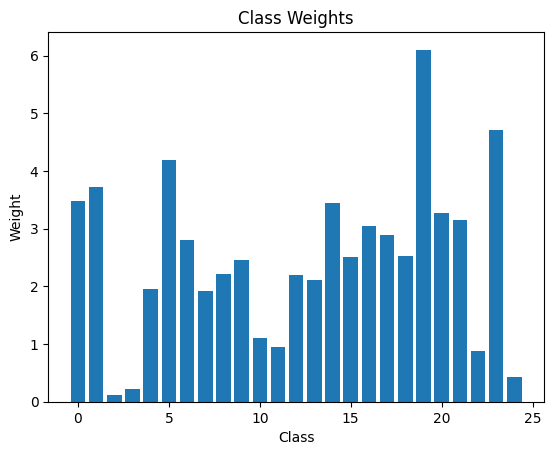

In [28]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert one-hot encoded labels to class labels
class_labels_train = np.argmax(labels_train, axis=1)
# Now, you can calculate class weights using compute_class_weight()
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(class_labels_train), y=class_labels_train)

import matplotlib.pyplot as plt
# Plot the weights for each class
plt.bar(np.unique(class_labels_train), class_weights)
plt.xlabel('Class')
plt.ylabel('Weight')
plt.title('Class Weights')
plt.show()

------------------------------------------------------------------


In [29]:
# Définir une fonction pour le modèle AlexNet
def Alexnet():

  # Définir le modèle comme un modèle séquentiel
  model = Sequential()

  # Couche 1 du modèle  ------>  couche de convolution + couche de max-pooling
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides = 4, padding = 'valid',
                   activation = 'relu', input_shape = (img_size, img_size, 3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # Couche 2 du modèle  ------>  couche de convolution + couche de max-pooling
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same',
                   activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # Couches 3 à 5 du modèle  ------>  couches de convolution + 1 couche de max-pooling
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same',
                   activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same',
                   activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same',
                   activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # Couches 6 à 8 du modèle  ------> deux couches cachées entièrement connectées et une couche de sortie entièrement connectée

  # Faire une couche d'aplatissement
  model.add(Flatten())


  # Définir l'activation de la couche de sortie comme softmax
  model.add(Dense(25, activation = 'softmax'))


  # Compiler le modèle en utilisant l'optimiseur Adam
  model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

  return model

In [30]:
#for plotting the confusin matrix
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    #to show the confusion matrix plot
    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    #set fontsize and style of confusion matrix
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

    #set the titles of the confusion matrix
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
# Fonction pour tracer la matrice de confusion
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (10, 7), fontsize = 14):
    # Créer un DataFrame à partir de la matrice de confusion
    df_cm = pd.DataFrame(
        confusion_matrix, index = class_names, columns = class_names,
    )

    # Afficher le graphique de la matrice de confusion
    fig = plt.figure(figsize = figsize)

    try:
        # Créer une carte thermique avec des annotations
        heatmap = sns.heatmap(df_cm, annot = True, fmt = "d")
    except ValueError:
        raise ValueError("Les valeurs de la matrice de confusion doivent être des entiers.")

    # Définir la taille de la police et le style de la matrice de confusion
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = fontsize)

    # Définir les étiquettes pour la matrice de confusion
    plt.ylabel('Étiquette réelle')
    plt.xlabel('Étiquette prédite')

In [32]:
# Créer une instance du modèle AlexNet
Alexnet_model = Alexnet()

# Afficher le résumé du modèle
Alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 17, 17, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 384)         1

Epoch 1/50
210/210 [==============================] - 378s 2s/step - loss: 5.7363 - accuracy: 0.4089 - val_loss: 1.6624 - val_accuracy: 0.4651
Epoch 2/50
210/210 [==============================] - 380s 2s/step - loss: 1.0698 - accuracy: 0.6444 - val_loss: 0.8225 - val_accuracy: 0.6976
Epoch 3/50
210/210 [==============================] - 379s 2s/step - loss: 0.7468 - accuracy: 0.7161 - val_loss: 0.6629 - val_accuracy: 0.7349
Epoch 4/50
210/210 [==============================] - 380s 2s/step - loss: 0.6545 - accuracy: 0.7331 - val_loss: 0.6833 - val_accuracy: 0.7386
Epoch 5/50
210/210 [==============================] - 379s 2s/step - loss: 0.6237 - accuracy: 0.7404 - val_loss: 0.6831 - val_accuracy: 0.7386
Epoch 6/50
210/210 [==============================] - 367s 2s/step - loss: 0.6495 - accuracy: 0.7365 - val_loss: 0.6318 - val_accuracy: 0.7410
Epoch 7/50
210/210 [==============================] - 378s 2s/step - loss: 0.5957 - accuracy: 0.7487 - val_loss: 0.5495 - val_accuracy: 0.7627

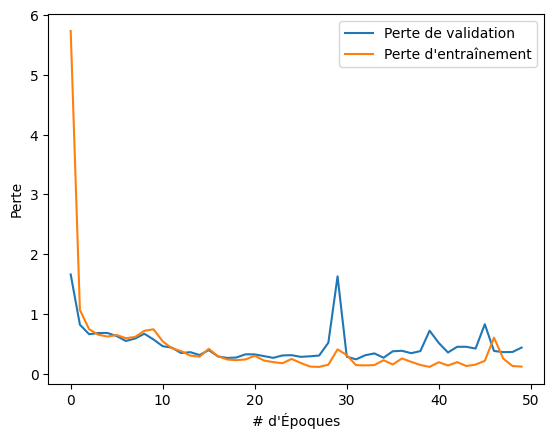

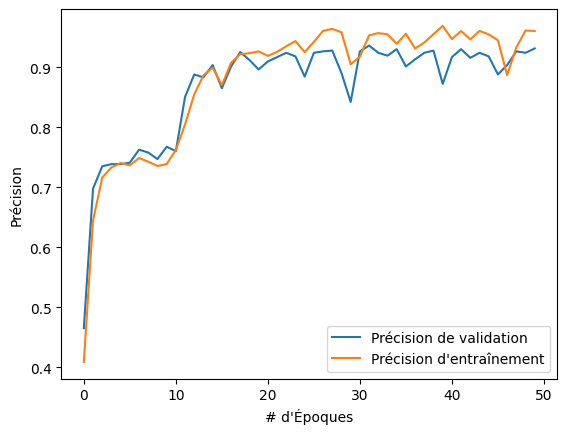

In [33]:
# Entraîner le modèle AlexNet
history_Alexnet = Alexnet_model.fit(imgs_train,
                                    labels_train,
                                    validation_data = (imgs_val, labels_val),
                                    epochs = 50)

# Tracer les courbes des pertes
loss_training = history_Alexnet.history['loss']
loss_test = history_Alexnet.history['val_loss']

# Tracer les courbes des précisions
accuracy_training = history_Alexnet.history['accuracy']
accuracy_test = history_Alexnet.history['val_accuracy']

# Pour tracer les pertes
plt.plot(loss_test)
plt.plot(loss_training)

# Définir les titres pour le graphique des pertes
plt.xlabel("# d'Époques")
plt.ylabel("Perte")
plt.legend(['Perte de validation', 'Perte d\'entraînement'])
plt.show()

# Pour tracer les précisions
plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# d'Époques")
plt.ylabel("Précision")
plt.legend(['Précision de validation', 'Précision d\'entraînement'])
plt.show()

In [34]:
# Calculer et afficher la précision de validation
scores = Alexnet_model.evaluate(imgs_val, labels_val)
print('Précision de validation finale d\'AlexNet :', scores[1])

26/26 [==============================] - 15s 583ms/step - loss: 0.4393 - accuracy: 0.9313
Précision de validation finale d'AlexNet : 0.9313253164291382


In [35]:
# Calculer et afficher la précision du test
imgs_test, labels_test = next(test)
scores_test = Alexnet_model.evaluate(imgs_test, labels_test)
print('Précision finale du test d\'AlexNet :', scores_test[1])

27/27 [==============================] - 13s 477ms/step - loss: 0.5245 - accuracy: 0.9200
Précision finale du test d'AlexNet : 0.920046329498291


In [36]:
# Faire la prédiction du modèle
predict_x = Alexnet_model.predict(imgs_test)
y_pred_alex = np.argmax(predict_x, axis = 1)  # Obtenir la classe prédite
y_test_alex = np.argmax(labels_test, axis = 1)  # Obtenir la classe réelle

27/27 [==============================] - 15s 546ms/step


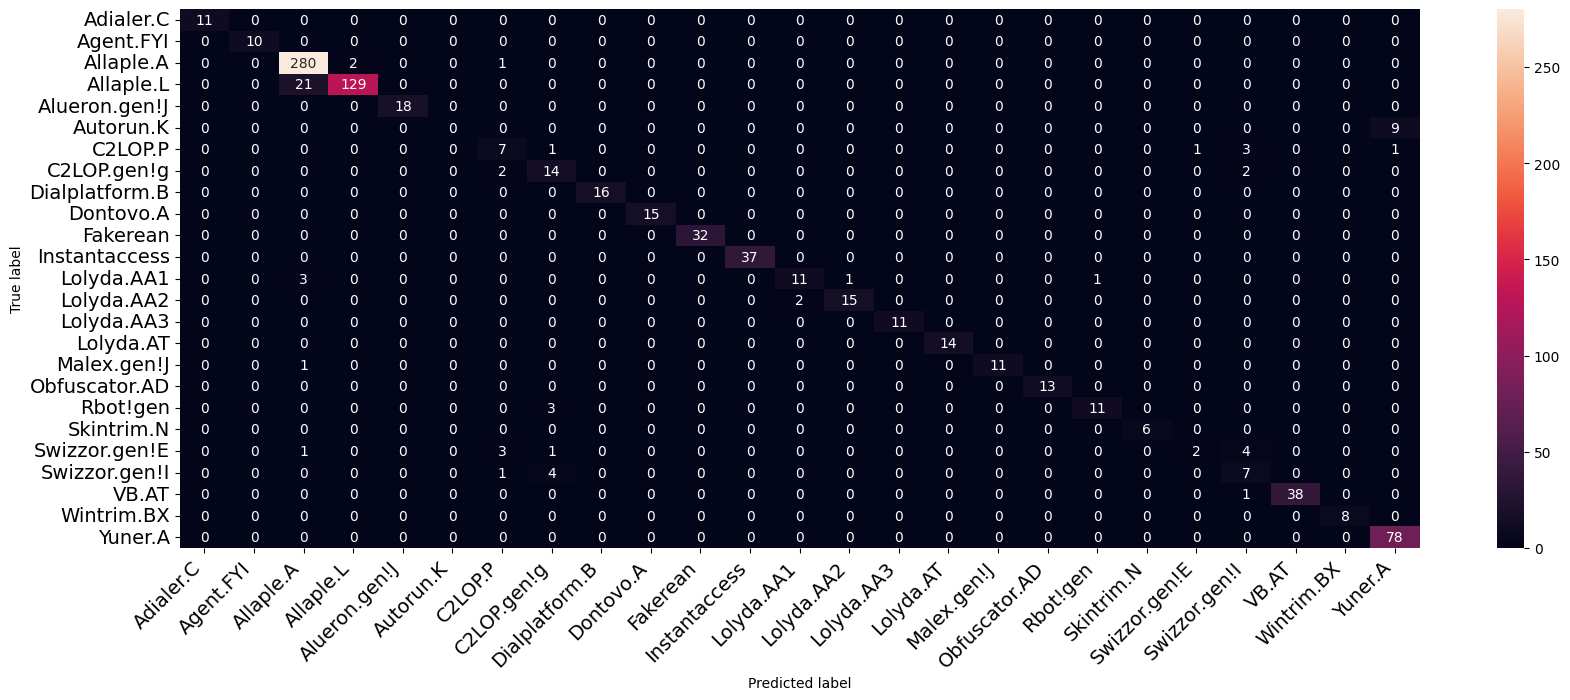

In [37]:
# Afficher la matrice de confusion du modèle de base
c_matrix_alex = metrics.confusion_matrix(y_test_alex, y_pred_alex)
class_names = test.class_indices.keys()

# Tracer la matrice de confusion à l'aide de la fonction personnalisée
confusion_matrix(c_matrix_alex, class_names, figsize = (20, 7), fontsize = 14)

In [38]:
# Afficher le rapport de classification du modèle de base
print('Rapport de test :\n', metrics.classification_report(y_test_alex, y_pred_alex))

Rapport de test :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       0.92      0.99      0.95       283
           3       0.98      0.86      0.92       150
           4       1.00      1.00      1.00        18
           5       0.00      0.00      0.00         9
           6       0.50      0.54      0.52        13
           7       0.61      0.78      0.68        18
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        37
          12       0.85      0.69      0.76        16
          13       0.94      0.88      0.91        17
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        14
          16       1.00      0.92      0.96        12
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
